<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/WEEK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

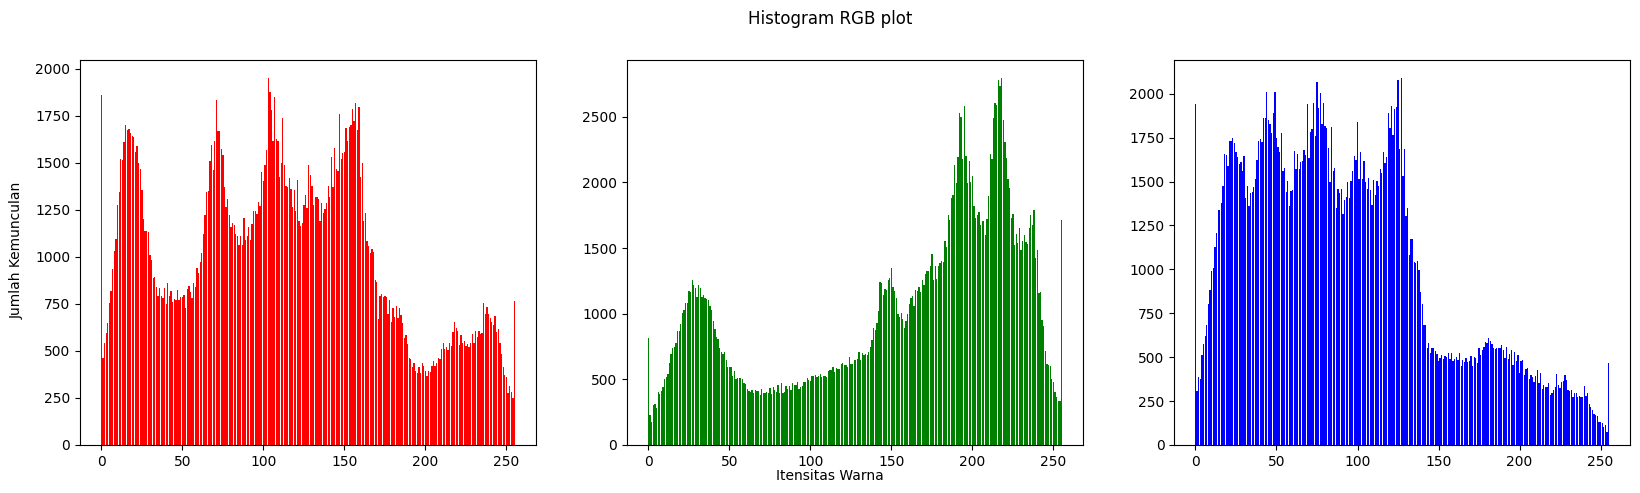

In [ ]:
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize = [20,5], sharex = True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Itensitas Warna', ha='center')
axs[0].bar(names, green, color='red')
axs[1].bar(names, red, color='green')
axs[2].bar(names, blue, color='blue')

**PERTANYAAN PRAKTIKUM D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

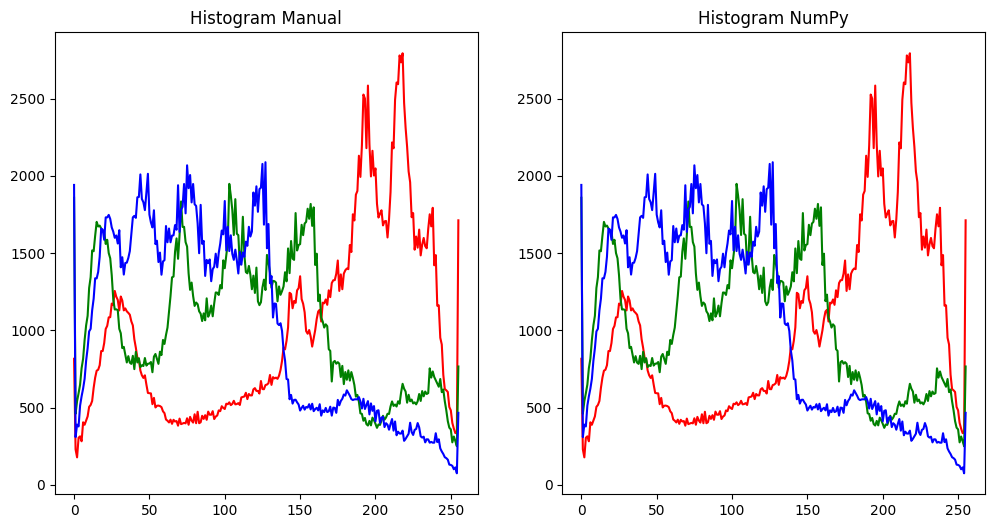

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)

red_manual = [0]*256
green_manual = [0]*256
blue_manual = [0]*256

for y in range(height):
    for x in range(width):
        r, g, b = img[y, x]
        red_manual[r] += 1
        green_manual[g] += 1
        blue_manual[b] += 1

red_np, _ = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_np, _ = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_np, _ = np.histogram(img[:,:,2], bins=256, range=(0,256))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Histogram Manual")
plt.plot(red_manual, color='r')
plt.plot(green_manual, color='g')
plt.plot(blue_manual, color='b')

plt.subplot(1,2,2)
plt.title("Histogram NumPy")
plt.plot(red_np, color='r')
plt.plot(green_np, color='g')
plt.plot(blue_np, color='b')

plt.show()


2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

/tmp/ipython-input-1136492139.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,0].hist(r.ravel(), 256, [0,256], color='r')
/tmp/ipython-input-1136492139.py:44: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,1].hist(g.ravel(), 256, [0,256], color='g')
/tmp/ipython-input-1136492139.py:47: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,2].hist(b.ravel(), 256, [0,256], color='b')
/tmp/ipython-input-1136492139.py:51: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[2,0].hist(r_eq.ravel(), 25

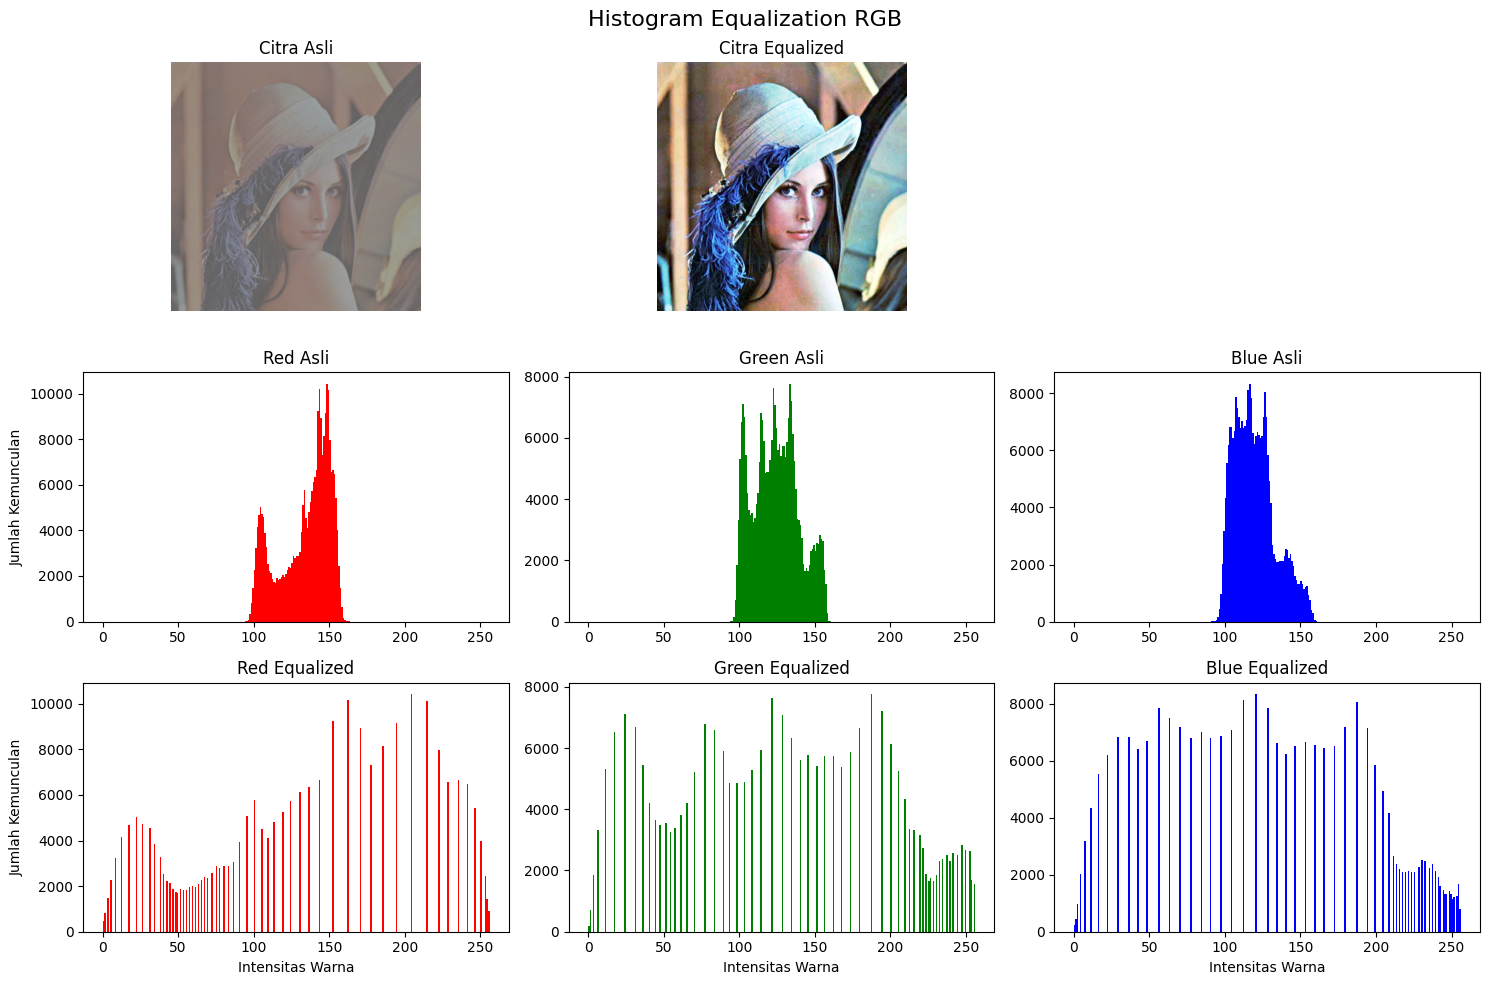

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Tugas PCVK/lena_lc.jpg'
img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img_rgb)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)
img_eq_rgb = cv2.merge((r_eq, g_eq, b_eq))

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Histogram Equalization RGB", fontsize=16)

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Citra Asli")
axes[0,0].axis("off")

axes[0,1].imshow(img_eq_rgb)
axes[0,1].set_title("Citra Equalized")
axes[0,1].axis("off")

axes[0,2].axis("off")

axes[1,0].hist(r.ravel(), 256, [0,256], color='r')
axes[1,0].set_title("Red Asli")
axes[1,0].set_ylabel("Jumlah Kemunculan")

axes[1,1].hist(g.ravel(), 256, [0,256], color='g')
axes[1,1].set_title("Green Asli")

axes[1,2].hist(b.ravel(), 256, [0,256], color='b')
axes[1,2].set_title("Blue Asli")

axes[2,0].hist(r_eq.ravel(), 256, [0,256], color='r')
axes[2,0].set_title("Red Equalized")
axes[2,0].set_xlabel("Intensitas Warna")
axes[2,0].set_ylabel("Jumlah Kemunculan")

axes[2,1].hist(g_eq.ravel(), 256, [0,256], color='g')
axes[2,1].set_title("Green Equalized")
axes[2,1].set_xlabel("Intensitas Warna")

axes[2,2].hist(b_eq.ravel(), 256, [0,256], color='b')
axes[2,2].set_title("Blue Equalized")
axes[2,2].set_xlabel("Intensitas Warna")

plt.tight_layout()
plt.show()


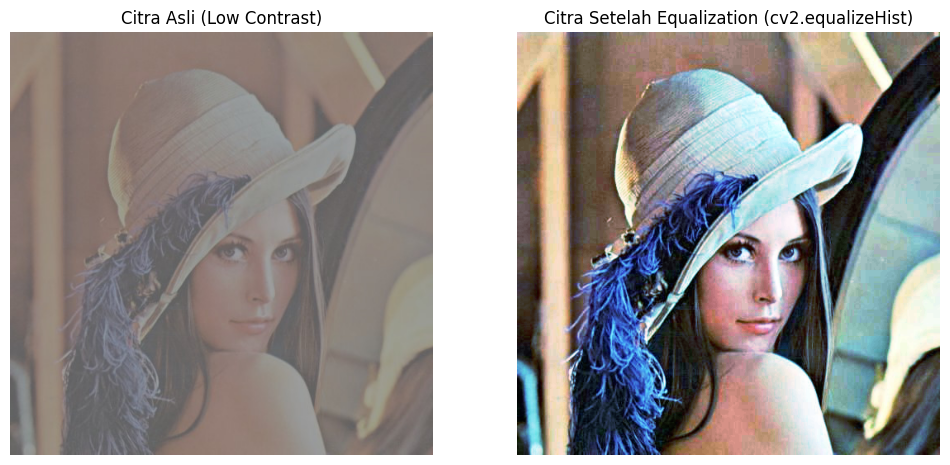

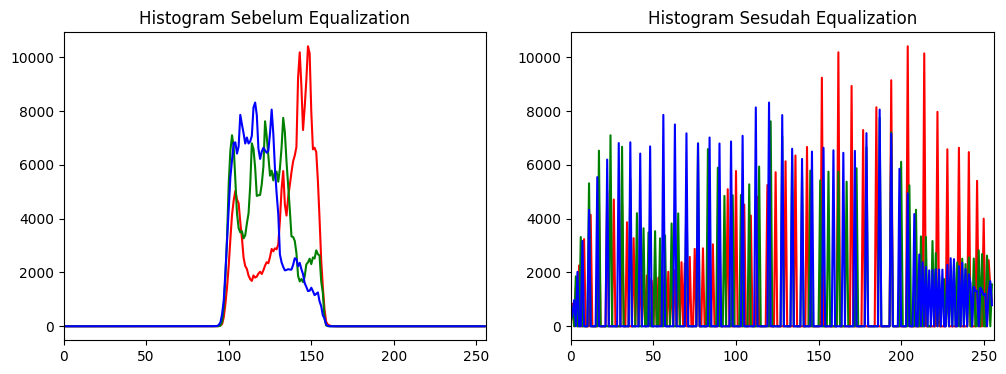

In [8]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Tugas PCVK/lena_lc.jpg'
image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

b, g, r = cv2.split(image_rgb)

b_equalized = cv2.equalizeHist(b)
g_equalized = cv2.equalizeHist(g)
r_equalized = cv2.equalizeHist(r)

image_eq = cv2.merge((b_equalized, g_equalized, r_equalized))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_rgb)
axes[0].set_title("Citra Asli (Low Contrast)")
axes[0].axis("off")

axes[1].imshow(image_eq)
axes[1].set_title("Citra Setelah Equalization (cv2.equalizeHist)")
axes[1].axis("off")

plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4))

for i, col in enumerate(('r','g','b')):
    hist = cv2.calcHist([image_rgb],[i],None,[256],[0,256])
    axes2[0].plot(hist, color=col)
axes2[0].set_title("Histogram Sebelum Equalization")
axes2[0].set_xlim([0,256])

for i, col in enumerate(('r','g','b')):
    hist = cv2.calcHist([image_eq],[i],None,[256],[0,256])
    axes2[1].plot(hist, color=col)
axes2[1].set_title("Histogram Sesudah Equalization")
axes2[1].set_xlim([0,256])

plt.show()


**PERTANYAAN PRAKTIKUM D2**

1. Perbandingan Citra Lena

a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.


c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

Jawab:
- PSNR tinggi (misalnya > 30 dB) → artinya citra hasil equalization sangat mirip dengan citra asli, perbedaan visual sangat kecil.

- PSNR rendah (< 20 dB) → artinya banyak perbedaan piksel, citra berubah cukup signifikan.

- Untuk histogram equalization, PSNR biasanya tidak terlalu tinggi (sering di bawah 25 dB), karena distribusi intensitas piksel berubah cukup besar.

Arti nilai PSNR terhadap kualitas visual citra

- PSNR hanya mengukur kesamaan numerik (piksel-to-piksel) antara citra asli dan hasil.

- Nilai rendah bukan berarti citra rusak, tetapi menandakan ada perubahan intensitas yang cukup besar akibat perataan histogram.

- Visualisasi seringkali lebih informatif daripada angka PSNR saja.

Ya, setelah histogram equalization:

- Daerah gelap dan terang lebih kontras, sehingga detail di area yang sebelumnya terlalu redup/gelap atau terlalu terang menjadi lebih terlihat.

- Contohnya pada topi, rambut, dan background pada Lena, tekstur yang tadinya samar lebih jelas terlihat.

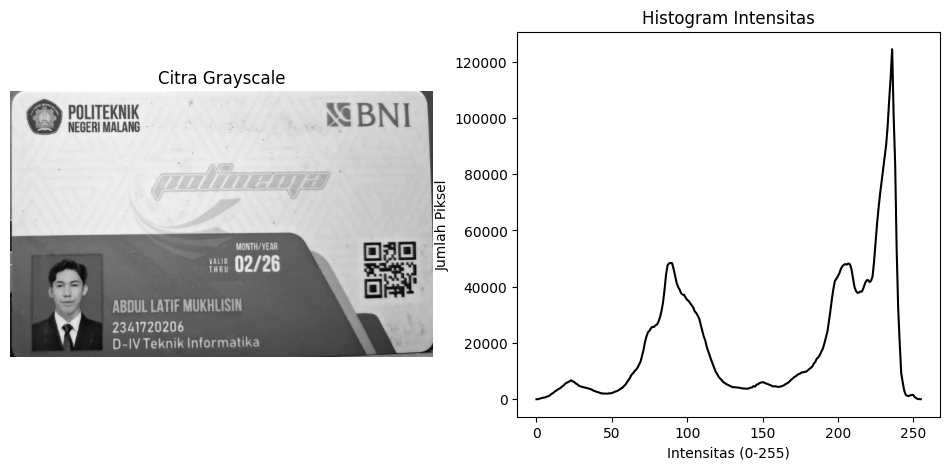

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Tugas PCVK/KTM Abdul Latif.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

hist, bins = np.histogram(gray, bins=256, range=(0,256))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Citra Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.plot(hist, color='black')
plt.title("Histogram Intensitas")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Piksel")

plt.show()


**D-3 TUGAS PRAKTIKUM DITHERING**

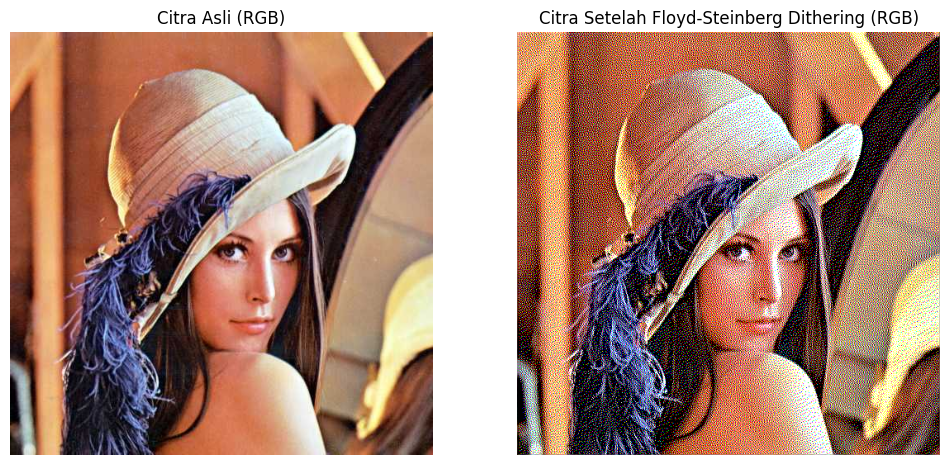

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Tugas PCVK/lena.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_float = img_rgb.astype(np.float32)

h, w, c = img_float.shape
for y in range(h-1):
    for x in range(1, w-1):
        for ch in range(c):
            old_pixel = img_float[y, x, ch]
            new_pixel = 0 if old_pixel < 128 else 255
            img_float[y, x, ch] = new_pixel
            error = old_pixel - new_pixel

            img_float[y, x+1, ch]   += error * 7/16
            img_float[y+1, x-1, ch] += error * 3/16
            img_float[y+1, x, ch]   += error * 5/16
            img_float[y+1, x+1, ch] += error * 1/16

img_dithered = np.clip(img_float, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_rgb)
axes[0].set_title("Citra Asli (RGB)")
axes[0].axis("off")

axes[1].imshow(img_dithered)
axes[1].set_title("Citra Setelah Floyd-Steinberg Dithering (RGB)")
axes[1].axis("off")

plt.show()


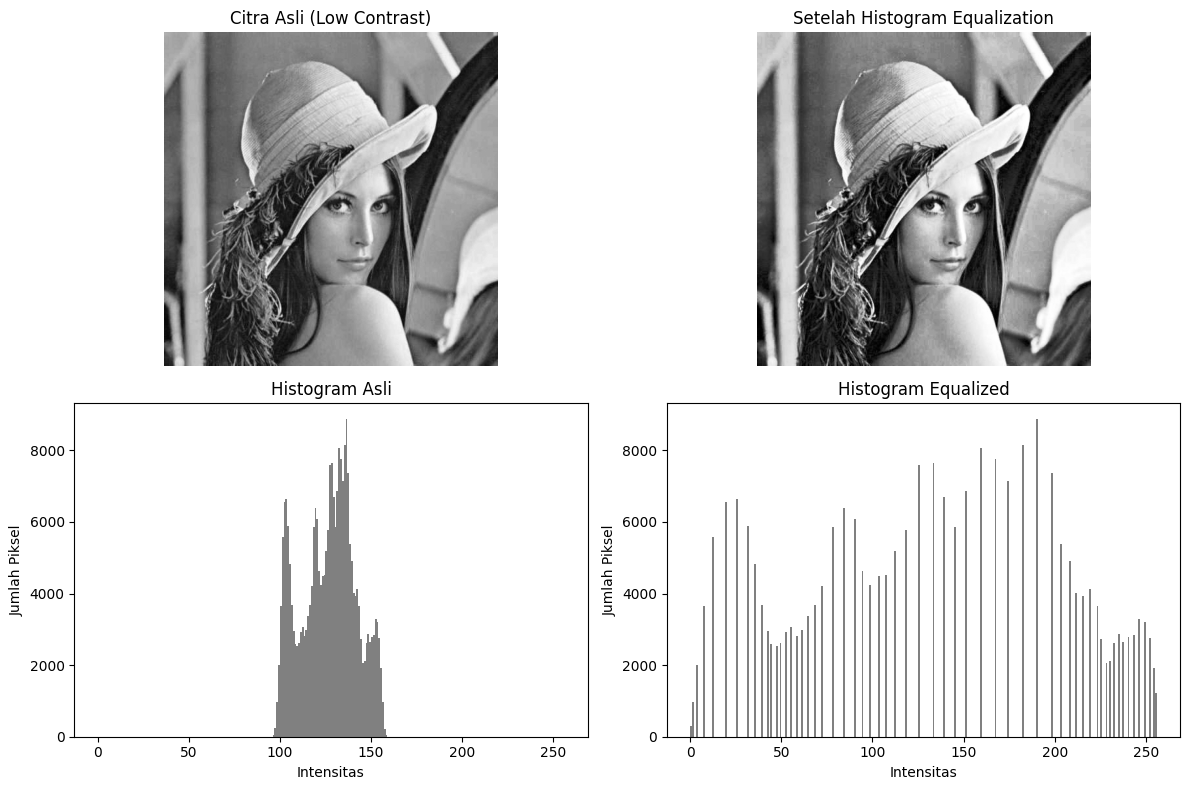

In [22]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Tugas PCVK/lena_lc.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

equalized = cv2.equalizeHist(img)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].imshow(img, cmap="gray")
axes[0,0].set_title("Citra Asli (Low Contrast)")
axes[0,0].axis("off")

axes[0,1].imshow(equalized, cmap="gray")
axes[0,1].set_title("Setelah Histogram Equalization")
axes[0,1].axis("off")

axes[1,0].hist(img.ravel(), bins=256, range=(0,256), color="gray")
axes[1,0].set_title("Histogram Asli")
axes[1,0].set_xlabel("Intensitas")
axes[1,0].set_ylabel("Jumlah Piksel")

axes[1,1].hist(equalized.ravel(), bins=256, range=(0,256), color="gray")
axes[1,1].set_title("Histogram Equalized")
axes[1,1].set_xlabel("Intensitas")
axes[1,1].set_ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()
